# Data Visualisation and Data Science

__Welcome to the final project of Data Visualisation and Data Science!__ 

In this project, you will explore a geological image dataset by applying some popular supervised and unsupervised machine learning techniques using scikit-learn. 

This notebook will walk you through some of the steps for preprocessing and preparing the dataset. As part of the final project, you will need to complete this notebook by building some models, creating visualisation to better represent the data and evaluating those models.

For this final project you will need to finish the following tasks:

- Data preparation
  - Apply 3 different techniques of unsupervised learning for Dimensionality Reduction.
  - Select the appropiate number of features for each tecnique applied.
  - Visualise the 2d plots for the 3 different clusters (Each cluster representing one type of rock).
- Model Development
  - Use 2 different techniques of clustering and create 2d plots to visualise those.
      <div class="alert alert-info" style="font-size:100%">
<b>HINT</b>: <br>
        Use the same reduced data you used for the 2d plots. You might find that some tecniques works better than other. So it is worth to explore and visualise different 2d clusters.
      </div>
    
  - Use 3 different supervised learning techniques to predict if an image corresponds to `carbonate`,`coal`, or `sandstone` and evaluate their performance.
  - Choose the best one based on the metrics below.
- Evaluation
  - Evaluate the supervised learning models created using TP,TN, FP, FN, accuracy, recall, precision, confusion matrixc, F1-Score, AUC and ROC curves. Create visualisations when possible for those metrics (For example, AUC, Confusion Matrix and ROC). 

# Import Libraries

In [17]:
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image
from ipywidgets import interact, widgets
import torchvision
import matplotlib.pyplot as plt

# Magic Function
%matplotlib inline
# Hide all warnings
import warnings
warnings.filterwarnings('ignore') # warnings.filterwarnings(action='once')

# Load Dataset

For this project we will used a preproceseed version of the dataset. Please check the notebook ***** to understand the process.

In [18]:
datadir = Path('../../data/processed/deep-rock-sr/')

In [19]:
# Load the 
sorted(datadir_out.glob('**/*train_*'))

[PosixPath('../../data/processed/deep-rock-sr/DeepRockSR-2D/carbonate2D/carbonate2D_train_LR_default_X4'),
 PosixPath('../../data/processed/deep-rock-sr/DeepRockSR-2D/coal2D/coal2D_train_LR_default_X4'),
 PosixPath('../../data/processed/deep-rock-sr/DeepRockSR-2D/sandstone2D/sandstone2D_train_LR_default_X4'),
 PosixPath('../../data/processed/deep-rock-sr/DeepRockSR-3D/carbonate3D/carbonate3D_train_LR_default_X4'),
 PosixPath('../../data/processed/deep-rock-sr/DeepRockSR-3D/coal3D/coal3D_train_LR_default_X4'),
 PosixPath('../../data/processed/deep-rock-sr/DeepRockSR-3D/sandstone3D/sandstone3D_train_LR_default_X4')]

In [60]:
# Load 2D Images
data_train = torchvision.datasets.ImageFolder(
    '../../data/processed/deep-rock-sr/DeepRockSR-2D/',
    is_valid_file=lambda f:('train_LR_default_X4' in f) and not ('shuffle' in f)
)

The dataset have three types of rock:

In [11]:
data_train.classes

['carbonate2D', 'coal2D', 'sandstone2D']

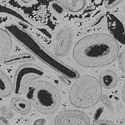

In [21]:
# Let's visualise the first image in the dataset
data_train[0][0]

Now let's visualise all images in the dataset using `interact`. We can pass any python function followed by arguments (e.g. `interval` to the show.

In [24]:
# Number of images in the dataset
len(data_train)

9600

In [30]:
# In this dataset, the first 
data_train[0]

(<PIL.Image.Image image mode=RGB size=125x125 at 0x12F0DEA90>, 0)

In the first position there is a PIL image and the second one correspond to the label:

0: carbonate2D
1: coal2D
2: sandstone3D

In [35]:
def show_image(interval):
    print('label:',data_train[interval][1])
    print('label_str:',data_train.classes[data_train[interval][1]])
    display(data_train[interval][0])

In [37]:
interact(show_image, interval=(0, len(data_train)-1))

interactive(children=(IntSlider(value=4799, description='interval', max=9599), Output()), _dom_classes=('widge…

<function __main__.show_image(interval)>

Images are a type of data. For colored images they usually range from 0 to 255 and have 3 dimensions for every channel (R)ed, (G)reen, (B)lue.

More information related to the RGB colors space: https://en.wikipedia.org/wiki/RGB_color_model

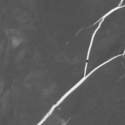

In [38]:
# let's check any random image
img = data_train[4799][0]
display(img)

That same image can be analyse as a multidimensional array where every pixel has 3 values in the RGB color space.

To check the values we will first need to convert the PIL image to an array. We will do so using the numpy library:

In [43]:
img = np.array(img)
print(img.shape)

(125, 125, 3)


If we try to flatten out the array to one single dimension we would have a vector with size 46875

In [46]:
125*125*3

46875

This means that we have an image with a size of 125x125 and 3 channels (RGB channels). Let's have a look at the data inside.

In [45]:
img

array([[[ 84,  84,  84],
        [ 86,  86,  86],
        [ 82,  82,  82],
        ...,
        [210, 210, 210],
        [115, 115, 115],
        [ 85,  85,  85]],

       [[ 84,  84,  84],
        [ 87,  87,  87],
        [ 83,  83,  83],
        ...,
        [161, 161, 161],
        [ 91,  91,  91],
        [ 85,  85,  85]],

       [[ 87,  87,  87],
        [ 90,  90,  90],
        [ 88,  88,  88],
        ...,
        [116, 116, 116],
        [ 83,  83,  83],
        [ 85,  85,  85]],

       ...,

       [[ 85,  85,  85],
        [ 84,  84,  84],
        [ 83,  83,  83],
        ...,
        [ 85,  85,  85],
        [ 86,  86,  86],
        [ 87,  87,  87]],

       [[ 84,  84,  84],
        [ 85,  85,  85],
        [ 84,  84,  84],
        ...,
        [ 84,  84,  84],
        [ 86,  86,  86],
        [ 86,  86,  86]],

       [[ 87,  87,  87],
        [ 88,  88,  88],
        [ 85,  85,  85],
        ...,
        [ 85,  85,  85],
        [ 84,  84,  84],
        [ 84,  84,  84]]

Because the images are actually gray-scale images (no colored) they will only need one channel instead of three.

We can take only one channel instead of three, whichseems to be duplicated data  in these case. But first, let's convert the images into arrays and split it into the features `X` and target `y`

In [68]:
X = np.array([np.array(img) for (img, target) in data_train])
y = np.array(data_train.targets)

In [69]:
X.shape

(9600, 125, 125, 3)

In [70]:
# In this line of code we are selecting only the first channel and reshapping our features array
X = X[:,:,:,0]

In [80]:
print(X.shape)
len_before = 125*125*3
len_after = 125*125
print('No. fearures before:',len_before)
print('No. features now:', len_after)
print(f"So we just removed a 1/3 of the redundant data. That's about {len_before-len_after} less than before")

(9600, 125, 125)
No. fearures before: 46875
No. features now: 15625
So we just removed a 1/3 of the redundant data. That's about 31250 less than before


Let's check the first image

In [81]:
print(X[0])
print('Shape:',X[0].shape)

[[183 185 154 ... 146 177 187]
 [184 184 126 ... 172 189 179]
 [153 163 146 ... 178 182 180]
 ...
 [168 171 169 ... 164 182 161]
 [165 184 170 ... 166 159 181]
 [158 181 165 ... 175 178 184]]
Shape: (125, 125)


Let's check if remove tha right channels. We can use `Image.fromarray` to convert back an array to a PIL Image. We will do this just to visually check if the new array is ok.

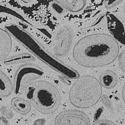

In [83]:
display(Image.fromarray(X[0]))

# Final Project

Complete the code and organise your code in a clear way. Add comments to your code the best as you can to explain your approach.

## 1. Data preparation and visualisation 

## 2. Model Development

## 3. Evaluation 